# Imports

In [1]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import ttk
import PIL as pil
from PIL import ImageTk, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from torch import nn
import torch as torch
import torchvision.transforms.functional as TF
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import confusion_matrix
from torchvision import transforms
import os
from tkinter import messagebox
import torchvision.models as models


## Import data

In [4]:
data_path = r'Data\train.csv'
temp_data = pd.read_csv(data_path, index_col=['Id'])

train_data = pd.DataFrame(temp_data)

X = train_data.drop(columns=['Pawpularity'])
y = train_data['Pawpularity']
random = 30997
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random)

# Uge 10 kapitel 7

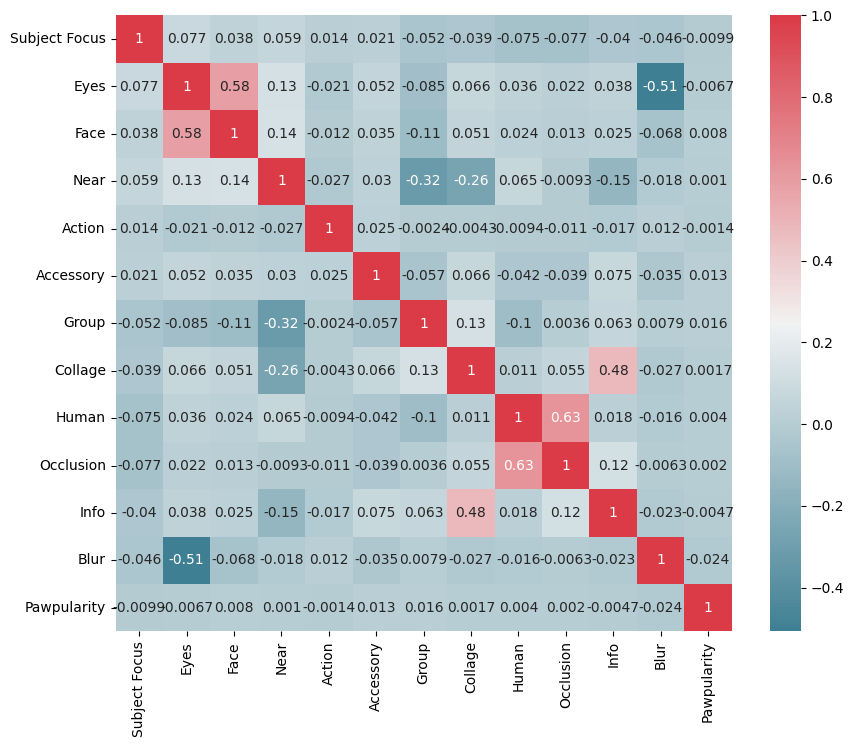

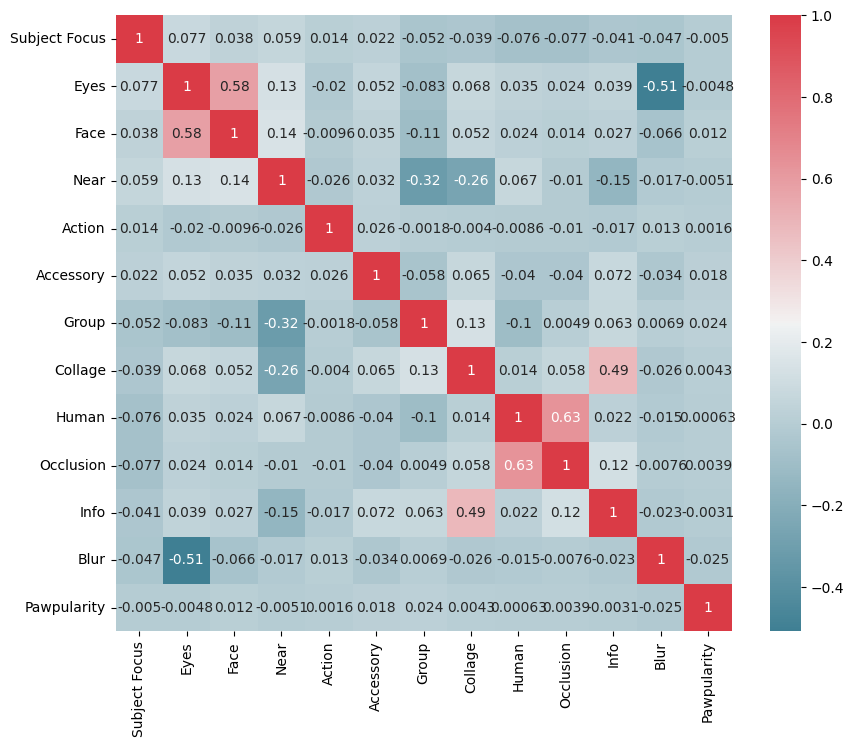

In [5]:
def correlationMatrix(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
    plt.show()
no100data = train_data.drop(train_data[train_data["Pawpularity"]==100].index)
correlationMatrix(train_data)
correlationMatrix(no100data)

In [6]:

def linear_regression( X: pd.DataFrame, y: pd.DataFrame):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    return lin_reg

lin_reg = linear_regression(X_train,y_train)


In [7]:
columns =   ["Occlusion", "Near", "Subject Focus", "Group"]
logiX = train_data[columns]
logiy = train_data['Human'].values
logiX_train, logiX_test,logiy_train,logiy_test = train_test_split(logiX,logiy,test_size=0.2,random_state=random)

def logistic_regression_contains_human(X: pd.DataFrame, y:pd.DataFrame):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg


logi_reg = logistic_regression_contains_human(logiX_train,logiy_train)




# Uge 10 kapitel 8

## TTK

In [8]:
window = tk.Tk()
window.title("Image application")
window.geometry("600x400")

frame  = ttk.Frame(window)
frame.pack()

sub_value = IntVar()
subcheck = tk.Checkbutton(frame, text="Sub", variable=sub_value)
subcheck.pack()

eye_value = IntVar()
eyecheck = tk.Checkbutton(frame, text="eye", onvalue=1 , offvalue=0, variable=eye_value)
eyecheck.pack()

face_value = IntVar()
facecheck = tk.Checkbutton(frame, text="face", onvalue=1 , offvalue=0, variable=face_value)
facecheck.pack()

near_value = IntVar()
nearcheck = tk.Checkbutton(frame, text="near", onvalue=1 , offvalue=0, variable=near_value)
nearcheck.pack()

act_value = IntVar()
actcheck = tk.Checkbutton(frame, text="act", onvalue=1 , offvalue=0, variable=act_value)
actcheck.pack()

acc_value = IntVar()
acccheck = tk.Checkbutton(frame, text="acc", onvalue=1 , offvalue=0, variable=acc_value)
acccheck.pack()

gru_value = IntVar()
grucheck = tk.Checkbutton(frame, text="gru", onvalue=1 , offvalue=0, variable=gru_value)
grucheck.pack()

col_value = IntVar()
colcheck = tk.Checkbutton(frame, text="col", onvalue=1 , offvalue=0, variable=col_value)
colcheck.pack()

hum_value = IntVar()
humcheck = tk.Checkbutton(frame, text="hum", onvalue=1 , offvalue=0, variable=hum_value)
humcheck.pack()

occ_value = IntVar()
occcheck = tk.Checkbutton(frame, text="occ", onvalue=1 , offvalue=0, variable=occ_value)
occcheck.pack()

inf_value = IntVar()
infcheck = tk.Checkbutton(frame, text="inf", onvalue=1 , offvalue=0, variable=inf_value)
infcheck.pack()

blu_value = IntVar()
blucheck = tk.Checkbutton(frame, text="blu", onvalue=1 , offvalue=0, variable=blu_value)
blucheck.pack()

image_label = Label()
score_Text = Label()

def searchImage():
    getvalue = train_data.loc[(train_data["Subject Focus"] == sub_value.get()) & (train_data["Eyes"] == eye_value.get()) & (train_data["Face"] == face_value.get()) & (train_data["Near"] == near_value.get()) & (train_data["Action"] == act_value.get()) & (train_data["Accessory"] == acc_value.get()) & (train_data["Group"] == gru_value.get()) & (train_data["Collage"] == col_value.get()) & (train_data["Human"] == hum_value.get()) & (train_data["Occlusion"] == occ_value.get()) & (train_data["Info"] == inf_value.get()) & (train_data["Blur"] == blu_value.get())]
    if len(getvalue) > 0:
        if logi_reg.predict(getvalue[columns])[0] == 0:
            score_Text.config(text="predicted score = " + str(lin_reg.predict(getvalue.drop(columns=["Pawpularity"]))[0]) + ". Actual score = "+ str(getvalue["Pawpularity"][0]))
            link = f"Data\\train\\{str(getvalue.index[0])}.jpg"
            my_img = ImageTk.PhotoImage(Image.open(link))
            image_label.configure(image=my_img)
            image_label.image = my_img


myButton = Button(frame, text='Åben billede', command=searchImage)

myButton.pack()
score_Text.pack()
image_label.pack()

window.mainloop()

## Uge 11 kapitel 9

## Uge 12 kapitel 10

## Uge 15 kapitel 11

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [10]:
data_path = r'Data\train.csv'
temp_data = pd.read_csv(data_path, index_col=False)

train_data = pd.DataFrame(temp_data)

scaler = MinMaxScaler()

X = temp_data.drop(columns=['Id'])

scaler.fit(X[['Pawpularity']])


X['Pawpularity'] = scaler.transform(X[['Pawpularity']])

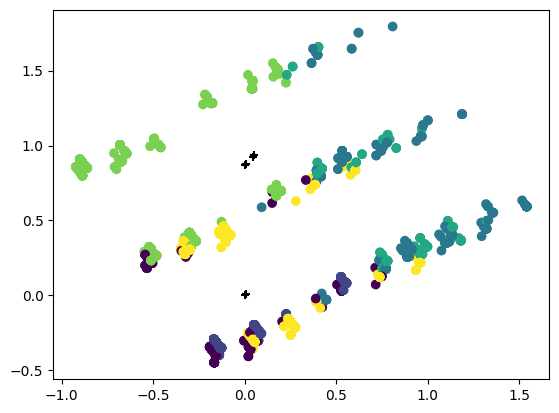

In [11]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

y = kmeans.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

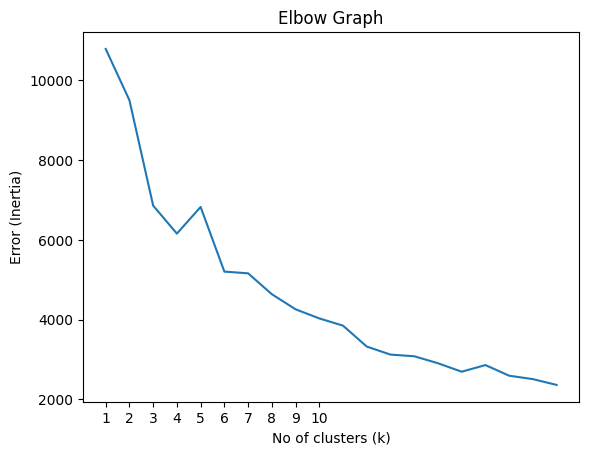

In [12]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(X)
 error.append(kmeans.inertia_)
import matplotlib.pyplot as plt

plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

## Uge 16+17 kapitel 12+13

## Uge 18 kapitel 14

Data prep

In [57]:

class ImageDatasetFromCSV(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels_df.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        return image, label

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

csv_file = r"Data/cat_or_dog_train.csv"  # Replace with your CSV file path
image_dir = r"Data/cat_or_dog_train"  # Replace with your image directory

full_dataset = ImageDatasetFromCSV(csv_file, image_dir, transform=transform)

# Define the train-test split ratio
train_ratio = 0.8
test_ratio = 0.2
total_size = len(full_dataset)
train_size = int(total_size * train_ratio)
test_size = total_size - train_size

convolutional_train_data, convolutional_test_data = random_split(full_dataset, [train_size, test_size])

# Create DataLoader for train and test datasets
batch_size = 32
convolutional_train_loader = DataLoader(convolutional_train_data, batch_size=batch_size, shuffle=True)
convolutional_test_loader = DataLoader(convolutional_test_data, batch_size=batch_size, shuffle=False)



Convolutional neural network model

In [58]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.convlayer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4)
        )
        self.fully_connected_layer_1 = nn.Linear(in_features=32*7*7, out_features=64)
        self.drop = nn.Dropout(0.25)
        self.fully_connected_layer_2 = nn.Linear(in_features=64, out_features=64)
        self.fully_connected_layer_3 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        out = self.convlayer(x)
        out = out.view(out.size(0), -1)
        out = self.fully_connected_layer_1(out)
        out = self.drop(out)
        out = self.fully_connected_layer_2(out)
        out = self.fully_connected_layer_3(out)
        return out

CNN_model = CNN()

error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.005)
lstlosses = []
lstiterations = []
lstaccuracy = []

predictions_list = []
labels_list = []

num_epochs = 3 
num_batches = 0 
batch_size = 16 

for epoch in range(num_epochs):
    print("Epoch: {} of {}".format(epoch + 1, num_epochs))
    for images, labels in convolutional_train_loader:
        train = Variable(images)
        labels = Variable(labels)

        outputs = CNN_model(train)
        loss = error(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        num_batches += 1

        if num_batches % batch_size == 0:
            total = 0
            matches = 0
            
            for images, labels in convolutional_test_loader:
                labels_list.append(labels)
                test = Variable(images)
                outputs = CNN_model(test)

                predictions = torch.max(outputs, 1)[1]
                predictions_list.append(predictions)
                matches += (predictions == labels).sum()
                total += len(labels)

            accuracy = matches * 100 / total
            lstlosses.append(loss.data)
            lstiterations.append(num_batches)
            lstaccuracy.append(accuracy)

        if not (num_batches % batch_size):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(num_batches, loss.data, accuracy))


print("Training completed.")



Epoch: 1 of 3
Iteration: 16, Loss: 0.8415203094482422, Accuracy: 49.1875%
Iteration: 32, Loss: 0.7039230465888977, Accuracy: 51.0625%
Iteration: 48, Loss: 0.7315853238105774, Accuracy: 50.875%
Iteration: 64, Loss: 0.6779823899269104, Accuracy: 52.8125%
Iteration: 80, Loss: 0.6710407137870789, Accuracy: 58.375%
Iteration: 96, Loss: 0.7955619096755981, Accuracy: 54.125%
Iteration: 112, Loss: 0.6575100421905518, Accuracy: 60.875%
Iteration: 128, Loss: 0.5622591376304626, Accuracy: 63.5%
Iteration: 144, Loss: 0.6008848547935486, Accuracy: 64.0625%
Iteration: 160, Loss: 0.685738742351532, Accuracy: 61.5%
Iteration: 176, Loss: 0.6296525597572327, Accuracy: 64.9375%
Iteration: 192, Loss: 0.6075736880302429, Accuracy: 64.8125%
Epoch: 2 of 3
Iteration: 208, Loss: 0.6752802729606628, Accuracy: 65.125%
Iteration: 224, Loss: 0.48504531383514404, Accuracy: 66.75%
Iteration: 240, Loss: 0.6266495585441589, Accuracy: 62.6875%
Iteration: 256, Loss: 0.6700592637062073, Accuracy: 67.6875%
Iteration: 272,

Applikation

In [59]:
def load_image(image_path):
    image = Image.open(image_path)
    return transform(image).unsqueeze(0)  # Add batch dimension

def predict_image(CNN_model, image_tensor):
    CNN_model.eval()
    with torch.no_grad(): 
        outputs = CNN_model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    return predicted

def display_prediction(image_name, predicted_label):
    class_names = ['Cat', 'Dog']  
    prediction_text = f"Predicted label: {predicted_label.item()} ({class_names[predicted_label]})"

    return prediction_text

def on_predict():
    image_name = entry.get()
    if not image_name:
        messagebox.showwarning("Input Error", "Please enter an image name.")
        return

    try:
        image_name_path = "Data/train/" + image_name + ".jpg"

        image_tensor = load_image(image_name_path)

        # Predict the label
        predicted_label = predict_image(CNN_model, image_tensor)

        prediction = display_prediction(image_name_path, predicted_label)

        result_label.config(text=prediction)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

window = tk.Tk()
window.title("Image Prediction Application")
window.geometry("600x400")

tk.Label(window, text="Enter image name:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

predict_button = tk.Button(window, text="Predict", command=on_predict)
predict_button.pack(pady=10)

result_label = tk.Label(window, text="", fg="blue")
result_label.pack(pady=20)

window.mainloop()

Uge 15 del 2

Data prep

In [53]:
csv_file = r"Data/train.csv"
image_dir = r"Data/train"

df = pd.read_csv(csv_file, nrows=100)

label_columns = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

labels_df = df[['Id'] + label_columns]


Classes og funktioner

In [54]:
class ImageDatasetFromCSV(Dataset):
    def __init__(self, labels_df, image_dir, transform=None, file_extension='.jpg'):
        self.labels_df = labels_df
        self.image_dir = image_dir
        self.transform = transform
        self.file_extension = file_extension


    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0] + self.file_extension)
        image = Image.open(img_name)
        labels = torch.tensor(self.labels_df.iloc[idx, 1:].values.astype('float32'))

        if self.transform:
            image = self.transform(image)

        return image, labels

class MultiLabelCNN(nn.Module):
    def __init__(self, num_classes):
        super(MultiLabelCNN, self).__init__()
        self.multi_model = models.resnet18(pretrained=True)
        self.multi_model.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.multi_model.fc = nn.Linear(self.multi_model.fc.in_features, num_classes)

    def forward(self, x):
        return self.multi_model(x)

num_classes = len(label_columns)
multi_model = MultiLabelCNN(num_classes)

full_dataset = ImageDatasetFromCSV(labels_df, image_dir, transform=transform)

c:\Users\blabl\Desktop\PAW\PetfinderPawpularityScore\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\blabl\Desktop\PAW\PetfinderPawpularityScore\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training

In [55]:
criterion = nn.BCEWithLogitsLoss()  # Suitable for multi-label classification
optimizer = torch.optim.Adam(multi_model.parameters(), lr=0.001)

batch_size = 16
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

lstlosses = []
lstiterations = []
lstaccuracy = []

num_epochs = 2 
num_batches = 0 
print_interval = 5

def train_model(multi_model, train_loader, criterion, optimizer, num_epochs, num_batches):
    for epoch in range(num_epochs):
        print(f"Epoch: {epoch + 1} of {num_epochs}")  
        for images, labels in train_loader:
            images = Variable(images)
            labels = Variable(labels)

            outputs = multi_model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            num_batches += 1

            if num_batches % print_interval == 0:
                total = 0
                correct = 0
                
                with torch.no_grad():
                    for images, labels in test_loader:
                        images = Variable(images)
                        labels = Variable(labels)
                        outputs = multi_model(images)
                        predicted = (outputs > 0.5).float()
                        correct += (predicted == labels).sum().item()
                        total += labels.numel() 

                accuracy = 100 * correct / total
                lstlosses.append(loss.item())
                lstiterations.append(num_batches)
                lstaccuracy.append(accuracy)

                print(f"Iteration: {num_batches}, Loss: {loss.item()}, Accuracy: {accuracy}%")

def evaluate_model(multi_model, test_loader):
    multi_model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = Variable(images)
            labels = Variable(labels)
            outputs = multi_model(images)
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.numel() 

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')

train_model(multi_model, train_loader, criterion, optimizer, num_epochs, num_batches)

evaluate_model(multi_model, test_loader)

Epoch: 1 of 2
Iteration: 5, Loss: 0.4678948223590851, Accuracy: 83.75%
Epoch: 2 of 2
Iteration: 10, Loss: 0.2665996849536896, Accuracy: 84.58333333333333%
Test Accuracy: 85.41666666666667%


In [56]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  
    return transform(image).unsqueeze(0)  # Add batch dimension

def predict_image(CNN_model, image_tensor):
    CNN_model.eval() 
    with torch.no_grad(): 
        outputs = CNN_model(image_tensor)
        predictions = torch.sigmoid(outputs).squeeze().numpy()
        predicted_labels = [label_columns[i] for i in range(len(label_columns)) if predictions[i] > 0.5]
    return predicted_labels

def display_prediction(predicted_labels):
    if not predicted_labels:
        return "No labels detected"
    else:
        return "Predicted labels: " + ", ".join(predicted_labels)

def on_predict():
    image_name = entry.get()
    if not image_name:
        messagebox.showwarning("Input Error", "Please enter an image name.")
        return

    try:
        image_name_path = os.path.join(r"Data/train", image_name + ".jpg")
        if not os.path.exists(image_name_path):
            raise FileNotFoundError(f"Image '{image_name}.jpg' not found in 'Data/cat_or_dog_train'")

        image_tensor = load_image(image_name_path)

        predicted_labels = predict_image(multi_model, image_tensor)

        prediction = display_prediction(predicted_labels)

        result_label.config(text=prediction)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

window = tk.Tk()
window.title("Image Prediction Application")
window.geometry("600x400")

tk.Label(window, text="Enter image name:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

predict_button = tk.Button(window, text="Predict", command=on_predict)
predict_button.pack(pady=10)

result_label = tk.Label(window, text="", fg="blue")
result_label.pack(pady=20)

window.mainloop()